In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Cleaning Training Data

In [2]:
train = pd.read_excel('Data_Train.xlsx')

In [3]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [4]:
train.shape

(6019, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [6]:
train.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [7]:
train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

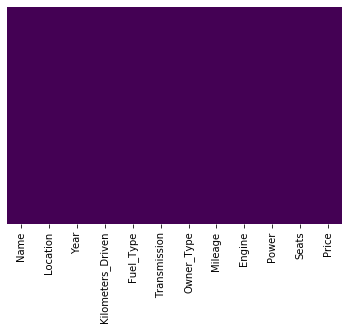

In [8]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
train.groupby('Seats')['Price'].nunique()

Seats
0.0        1
2.0       15
4.0       81
5.0     1161
6.0       30
7.0      390
8.0       97
9.0        3
10.0       4
Name: Price, dtype: int64

In [10]:
train.groupby('Mileage')['Price'].nunique()

Mileage
0.0 kmpl      59
10.0 kmpl     10
10.1 kmpl      7
10.13 kmpl     3
10.2 kmpl      6
              ..
9.52 kmpl      2
9.7 kmpl       1
9.74 kmpl      2
9.8 kmpl       4
9.9 kmpl       3
Name: Price, Length: 442, dtype: int64

####  There are "0.0" as values in the columns of mileage,power and engine so it can be considered as nan or empty value

In [11]:
train.groupby('Engine')['Price'].nunique()

Engine
1047 CC      4
1061 CC     23
1086 CC     69
1120 CC     37
1150 CC      7
          ... 
970 CC       1
993 CC      12
995 CC       8
998 CC     117
999 CC      26
Name: Price, Length: 146, dtype: int64

#### From the above it is obvious that the mileage,seats,engine,power cannot be zero , so we can consider it as an empty data and will impute it with mean or mode.

#### We can see that the columns of mileage , engine and power are of string types so we first have to remove the string associated with it and convert it to float type.

In [12]:
#Function to store the unit of mileage before converting it to float
train['Unit Mileage'] = train.Mileage.str.split().str.get(1)
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Unit Mileage
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,km/kg
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,kmpl
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,kmpl
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,kmpl
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,kmpl


In [13]:
def stringremover(doc):
    l = doc.split()
    for i in l:
        try:
            num = float(i)
            return num
        except:
            continue

#### So here we have created a function to get only numeric value.

In [14]:
mil_data = []
train['Mileage'] = train['Mileage'].fillna("0.0")
for i in range(len(train['Mileage'])):
    doc = train['Mileage'][i]
    res = stringremover(doc)
    mil_data.append(res)

In [15]:
train['Mileage'] = mil_data

In [16]:
for i in range(len(train['Mileage'])):
    str1 = train['Unit Mileage'][i]
    str2 = train['Fuel_Type'][i]
    if(str1=="km/kg"):
        if(str2=='CNG'):
            train['Mileage'][i]=train['Mileage'][i]*0.13
        elif(str2=='Petrol'):
            train['Mileage'][i]=train['Mileage'][i]*0.77
        elif(str2=='Diesel'):
            train['Mileage'][i]=train['Mileage'][i]*0.832
        elif(str2=='LPG'):
            train['Mileage'][i]=train['Mileage'][i]*0.51

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [17]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Unit Mileage
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,3.458,998 CC,58.16 bhp,5.0,1.75,km/kg
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.670,1582 CC,126.2 bhp,5.0,12.50,kmpl
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.200,1199 CC,88.7 bhp,5.0,4.50,kmpl
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.770,1248 CC,88.76 bhp,7.0,6.00,kmpl
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968 CC,140.8 bhp,5.0,17.74,kmpl


In [18]:
train.drop(columns=['Unit Mileage'])

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,3.458,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.670,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.200,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.770,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.400,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.400,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.000,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.900,998 CC,67.1 bhp,5.0,2.65


In [19]:
eng_data = []
train['Engine'] = train['Engine'].fillna("0.0")
for i in range(len(train['Engine'])):
    doc = train['Engine'][i]
    res = stringremover(doc)
    eng_data.append(res)

In [20]:
train['Engine'] = eng_data

In [21]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Unit Mileage
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,3.458,998.0,58.16 bhp,5.0,1.75,km/kg
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.670,1582.0,126.2 bhp,5.0,12.50,kmpl
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.200,1199.0,88.7 bhp,5.0,4.50,kmpl
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.770,1248.0,88.76 bhp,7.0,6.00,kmpl
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968.0,140.8 bhp,5.0,17.74,kmpl


In [22]:
pow_data = []
train['Power'] = train['Power'].fillna("0.0")
for i in range(len(train['Power'])):
    doc = train['Power'][i]
    res = stringremover(doc)
    pow_data.append(res)

In [23]:
train['Power'] = pow_data

In [24]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Unit Mileage
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,3.458,998.0,58.16,5.0,1.75,km/kg
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.670,1582.0,126.20,5.0,12.50,kmpl
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.200,1199.0,88.70,5.0,4.50,kmpl
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.770,1248.0,88.76,7.0,6.00,kmpl
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968.0,140.80,5.0,17.74,kmpl


In [25]:
train['Mileage'].replace(0.0,np.nan,inplace=True)
np.mean(train['Mileage'])

18.118121835602675

#### So we can take the mean of mileage as 18.00

In [26]:
train['Mileage'].fillna(value=18.00,inplace=True)

In [27]:
train['Engine'].replace(0.0,np.nan,inplace=True)
np.mean(train['Engine'])

1621.276449941501

#### So we can take the mean of engine as 1162.0

In [28]:
train['Engine'].fillna(value=1162.0,inplace=True)

In [29]:
np.mean(train['Power'])

112.56341677943078

#### So we can take the mean of power as 113.00

In [30]:
train['Power'].replace(0.0,np.nan,inplace=True)
train['Power'].fillna(value=113.0,inplace=True)

In [31]:
train['Seats'].replace(0.0,np.nan,inplace=True)
np.mean(train['Seats'])

5.2796184738955825

#### so we can take the mean of seats as 5.0

In [32]:
train['Seats'].fillna(value=5.0,inplace=True)

In [33]:
train.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Unit Mileage         2
dtype: int64

#### So we have succesfully imputed all the empty values and got the numeric values from the columns of mileage, power and engine

***Now lets know the number of Duplicate values***

In [35]:
test = pd.read_excel('Data_Test.xlsx')

(0, 1)

# EDA - Univariate Analysis

In [355]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [356]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Unit Mileage
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,3.458,998.0,58.16,5.0,1.75,km/kg
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.670,1582.0,126.20,5.0,12.50,kmpl
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.200,1199.0,88.70,5.0,4.50,kmpl
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.770,1248.0,88.76,7.0,6.00,kmpl
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968.0,140.80,5.0,17.74,kmpl


In [357]:
train.shape

(6019, 13)

Base information - 6019 different cars are analysed

In [358]:
train.columns.tolist()

['Name',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Price',
 'Unit Mileage']

In [359]:
train.describe() #summary statistics

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,18.116748,1618.529490,113.247038,5.277621,9.479468
std,3.269742,9.126884e+04,4.311347,600.598962,53.231033,0.803479,11.187917
min,1998.000000,1.710000e+02,1.716000,72.000000,34.200000,2.000000,0.440000
25%,2011.000000,3.400000e+04,15.260000,1197.000000,78.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.000000,1493.000000,98.600000,5.000000,5.640000
75%,2016.000000,7.300000e+04,20.920000,1969.000000,138.030000,5.000000,9.950000
max,2019.000000,6.500000e+06,28.400000,5998.000000,560.000000,10.000000,160.000000


INFERENCE - The mean price of cars is 9.4 lakhs

INFERENCE - The highest price is 160 lakhs

INFERENCE - The lowest price is 0.44 lakhs

### ANALYSIS ON LOCATION

In [360]:
train.Location.nunique() #the no. of locations

11

In [361]:
train.Location.unique() #the different locations

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [362]:
train.Location.value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

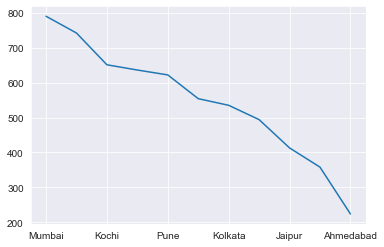

In [363]:
train.Location.value_counts().plot()

INFERENCE - There are 11 different locations

INFERENCE - The Maximum no. of cars are from Mumbai

INFERANCE - The Minimum no. of cars are from Ahmedabad

### ANALYSIS ON YEAR

In [364]:
train.Year.unique()

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998],
      dtype=int64)

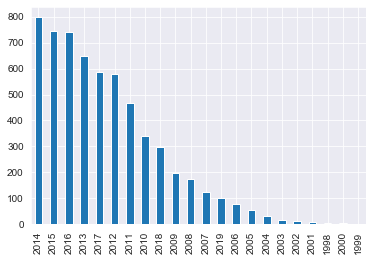

In [365]:
train.Year.value_counts().plot(kind='bar')

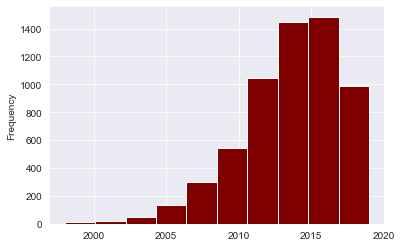

In [366]:
train.Year.plot(kind='hist',color='Maroon')

INFERENCE - The maximum no. of cars are from the year 2014 although the latest year in the data list is 2019 which had considerably lesser no. of cars 

### ANALYSIS ON KILOMETERS DRIVEN

In [367]:
print("Mean kilometers driven in the data is:",train.Kilometers_Driven.mean())

Mean kilometers driven in the data is: 58738.38029573019


In [368]:
print("Maximum kilometers driven in the data is:",train.Kilometers_Driven.max())

Maximum kilometers driven in the data is: 6500000


In [369]:
print("Minimum kilometers driven in the data is:",train.Kilometers_Driven.min())

Minimum kilometers driven in the data is: 171


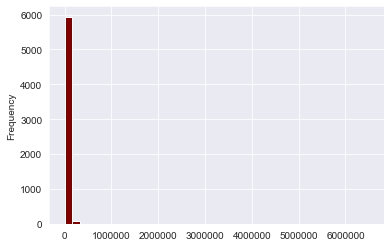

In [370]:
train.Kilometers_Driven.plot(kind='hist',color='Maroon',bins=40)

### ANALYSIS ON FUEL TYPE

In [371]:
train.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [372]:
train.Fuel_Type.value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

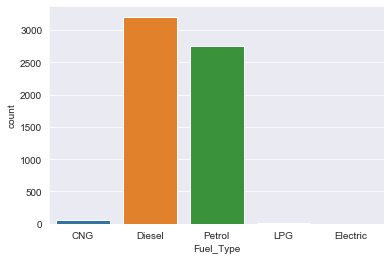

In [373]:
sns.countplot(data=train,x='Fuel_Type')

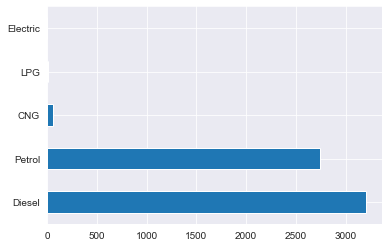

In [374]:
train.Fuel_Type.value_counts().plot(kind='barh')

INFERANCE - Maximum no. of cars are diesal cars

INFERANCE - Only two cars are electric cars which is at the minimum 

### ANALYSIS ON TRANSMISSION

In [375]:
train.Transmission.value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

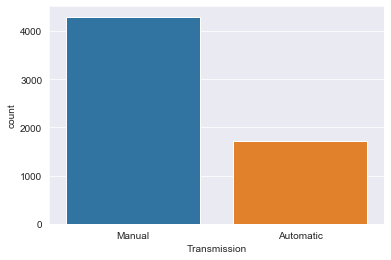

In [376]:
sns.countplot(data=train,x='Transmission')

INFERANCE - The number of manual cars are greater than the automatic cars

### ANALYSIS ON OWNER TYPE

In [377]:
train.Owner_Type.value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

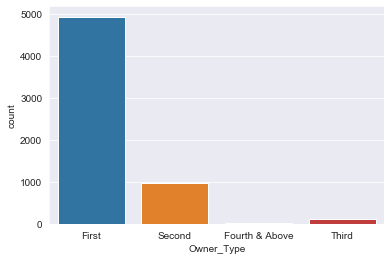

In [378]:
sns.countplot(x='Owner_Type',data=train)

INFERENCE - Around 5000 cars are firsthand cars and less than 10 belong to the fourth or above category

### ANALYSIS ON MILEAGE

In [379]:
print("Minimum Mileage in the data is:",train.Mileage.min())
print("Maximum Mileage in the data is:",train.Mileage.max())
print("Range of Mileage is from {} to {}".format(train.Mileage.min(),train.Mileage.max()))

Minimum Mileage in the data is: 1.716
Maximum Mileage in the data is: 28.4
Range of Mileage is from 1.716 to 28.4


In [380]:
train.Mileage.mean()

18.116748097690696

In [381]:
train[train.Mileage > 18.12].Name.count()

2966

In [382]:
train[train.Mileage < 18.12].Name.count()

3041

INFERENCE - 2966 cars have mileage above the mean mileage

INFERENCE - 3041 cars have mileage below the mean mileage

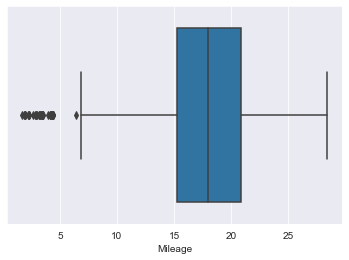

In [383]:
sns.boxplot(train['Mileage'])

### ANALYSIS ON ENGINE

In [384]:
print("Minimum engine volume in the data is:",train.Engine.min())
print("Maximum engine volume in the data is:",train.Engine.max())
print("Range of engine volume is from {} to {}".format(train.Engine.min(),train.Engine.max()))

Minimum engine volume in the data is: 72.0
Maximum engine volume in the data is: 5998.0
Range of engine volume is from 72.0 to 5998.0


In [385]:
train[train.Engine==72].Name

4446    Mahindra E Verito D4
Name: Name, dtype: object

In [386]:
train[train.Engine==5998].Name

5521    Bentley Continental Flying Spur
Name: Name, dtype: object

In [387]:
train.Engine.mean()

1618.5294899484963

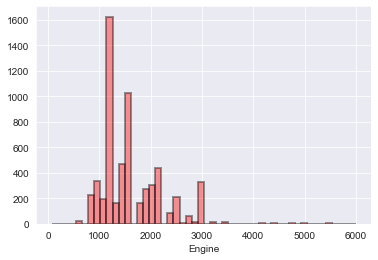

In [388]:
sns.distplot(train['Engine'],kde=False,hist_kws=dict(edgecolor="k", linewidth=2),color='red')

### ANALYSIS ON POWER

In [389]:
print("Minimum power in the data is:",train.Power.min())
print("Maximum power in the data is:",train.Power.max())
print("Range of power is from {} to {}".format(train.Power.min(),train.Power.max()))

Minimum power in the data is: 34.2
Maximum power in the data is: 560.0
Range of power is from 34.2 to 560.0


In [390]:
train[train.Power==0].Name.count()

0

INFERENCE - 36 cars have 0 power

In [391]:
train[train.Power==560].Name.count()


1

In [392]:
train[train.Power==560].Name

5781    Lamborghini Gallardo Coupe
Name: Name, dtype: object

In [393]:
train.Power.mean()

113.24703771390512

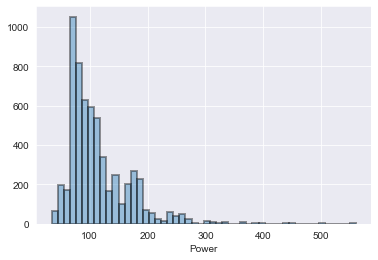

In [394]:
sns.distplot(train['Power'],kde=False,hist_kws=dict(edgecolor="k", linewidth=2))

### ANALYSIS ON SEATS

In [395]:
print("Minimum seats in the data is:",train.Seats.min())
print("Maximum seats in the data is:",train.Seats.max())

Minimum seats in the data is: 2.0
Maximum seats in the data is: 10.0


In [396]:
train.Seats.mean()

5.277620867253697

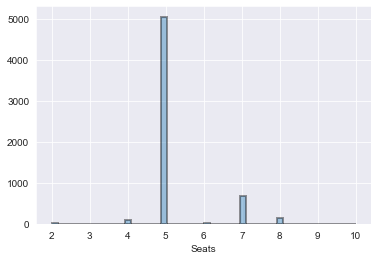

In [397]:
sns.distplot(train['Seats'],kde=False,hist_kws=dict(edgecolor="k", linewidth=2))

In [398]:
train.Seats.value_counts()

5.0     5057
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
Name: Seats, dtype: int64

INFERANCE - Maximum no. of cars are 5 seaters followed by 7 seaters

### ANALYSIS ON PRICE

In [95]:
print("Minimum price in the data is:",train.Price.min())
print("Maximum price in the data is:",train.Price.max())
print("Price range is from {} to {}".format(train.Price.min(),train.Price.max()))

Minimum price in the data is: 0.44
Maximum price in the data is: 160.0
Price range is from 0.44 to 160.0


In [96]:
train.Price.mean()

9.479468350224273

In [97]:
train[train.Price==0.44].Name #cheapest car

1713    Tata Nano Lx
Name: Name, dtype: object

In [98]:
train[train.Price==160].Name #costliest car

4079    Land Rover Range Rover 3.0 Diesel LWB Vogue
Name: Name, dtype: object

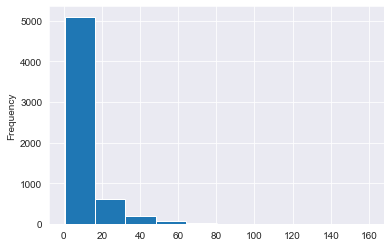

In [99]:
train.Price.plot(kind='hist')

INFERENCE - Maximum no. of cars are in the price range of 0.44 to 20 lakhs

#### Univariate analysis is completed.

# EDA - Bivariate Analysis

In [399]:
train['Brand'] = train.Name.str.split().str.get(0)
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Unit Mileage,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,3.458,998.0,58.16,5.0,1.75,km/kg,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.670,1582.0,126.20,5.0,12.50,kmpl,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.200,1199.0,88.70,5.0,4.50,kmpl,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.770,1248.0,88.76,7.0,6.00,kmpl,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968.0,140.80,5.0,17.74,kmpl,Audi


A new column brand from the column name is added for the analysis.

#### FACTORS AFFECTING PRICE

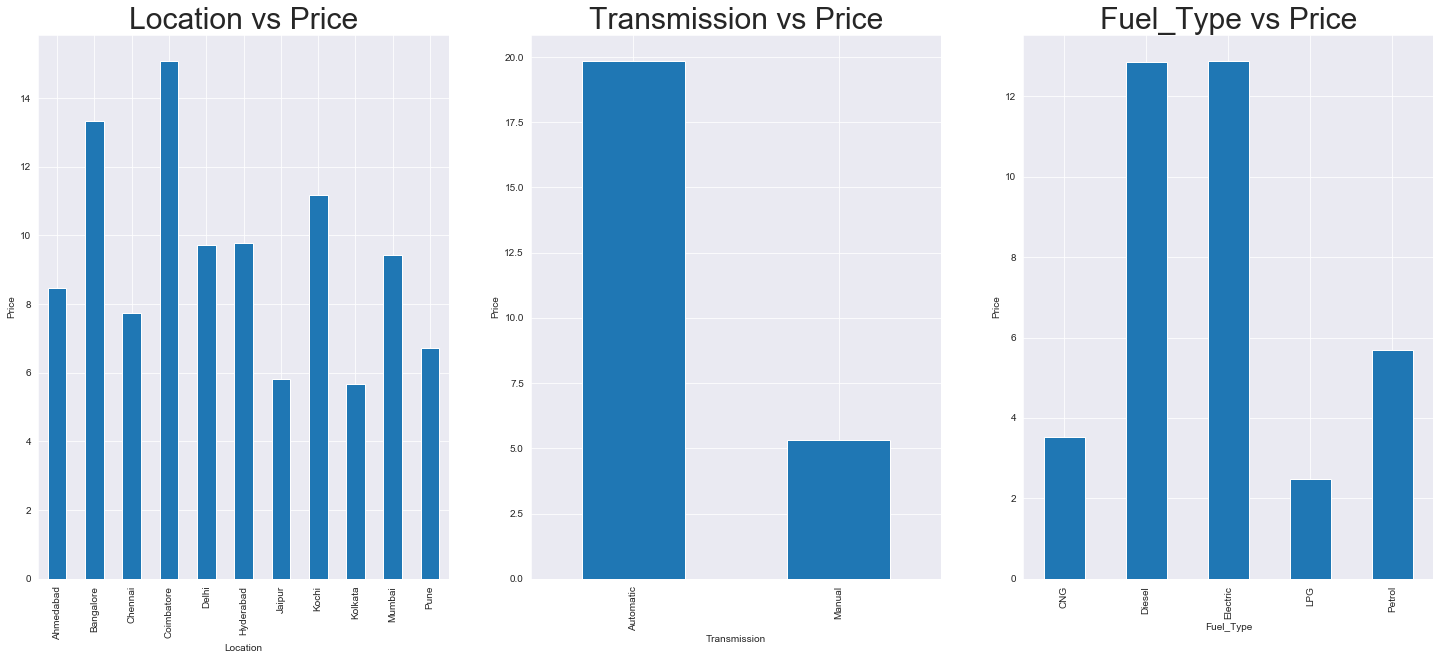

In [400]:
plt.figure(figsize=(25,10))
plt.subplot(131)
plt.title('Location vs Price',fontsize = 30)
plt.ylabel("Price")
train.groupby('Location')['Price'].mean().plot.bar()
plt.subplot(132)
plt.title('Transmission vs Price',fontsize = 30)
plt.ylabel("Price")
train.groupby('Transmission')['Price'].mean().plot.bar()
plt.subplot(133)
plt.title('Fuel_Type vs Price',fontsize = 30)
plt.ylabel("Price")
train.groupby('Fuel_Type')['Price'].mean().plot.bar()

INFERENCE: 
- The cars of Coimbatore have the maximum price and Kolkata has the minimum price car.
- Automatic cars have more price than manual ones.
- Diesel and Electric cars have almost the same price which is maximum and LPG cars have the lowest price.

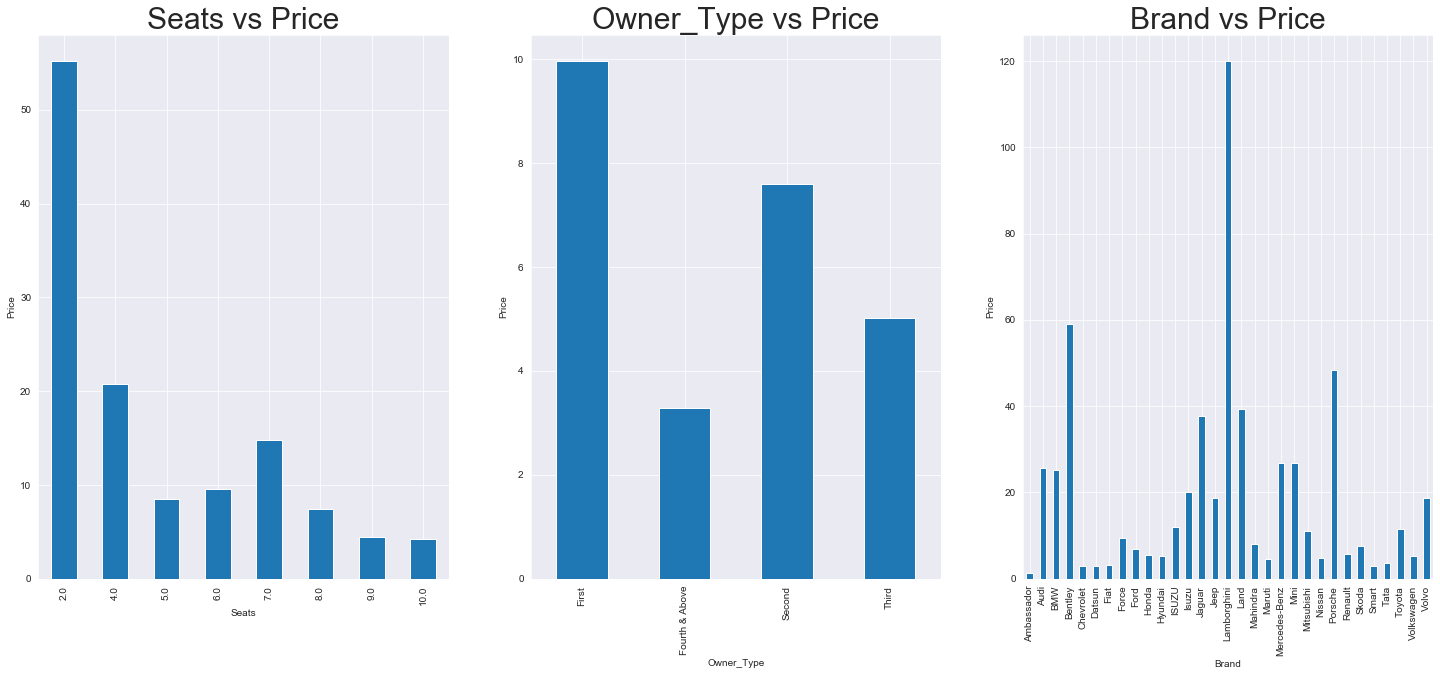

In [401]:
plt.figure(figsize=(25,10))
plt.subplot(131)
plt.title('Seats vs Price',fontsize = 30)
plt.ylabel("Price")
train.groupby('Seats')['Price'].mean().plot.bar()
plt.subplot(132)
plt.title('Owner_Type vs Price',fontsize = 30)
plt.ylabel("Price")
train.groupby('Owner_Type')['Price'].mean().plot.bar()
plt.subplot(133)
plt.title('Brand vs Price',fontsize = 30)
plt.ylabel("Price")
train.groupby('Brand')['Price'].mean().plot.bar()

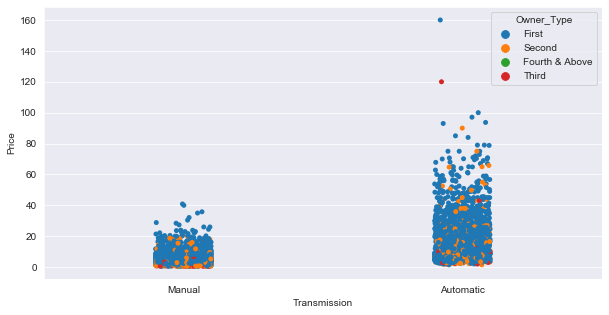

In [402]:
plt.figure(figsize=(10,5))
sns.stripplot(x='Transmission',y='Price',data=train,hue='Owner_Type')

INFERENCE:
- The 2 seater cars have the highest price and the price of cars with 9 and 10 seats is the minimum.
- The first handed cars are the most expensive and fourth and above are the cheapest.
- Lambhorgini has the highest price whereas Ambassador has the lowest.

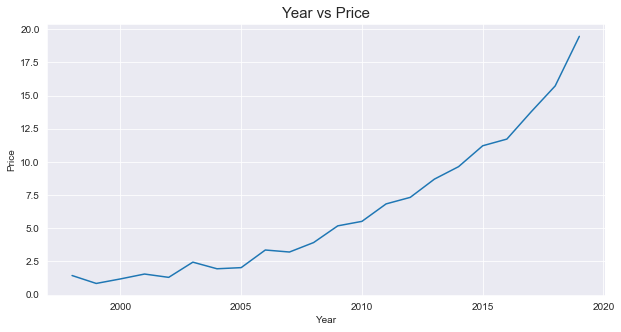

In [403]:
plt.figure(figsize=(10,5))
plt.title('Year vs Price',fontsize = 15)
plt.ylabel("Price")
train.groupby('Year')['Price'].mean().plot.line()

INFERENCE - The recent the car is, the more is the price.

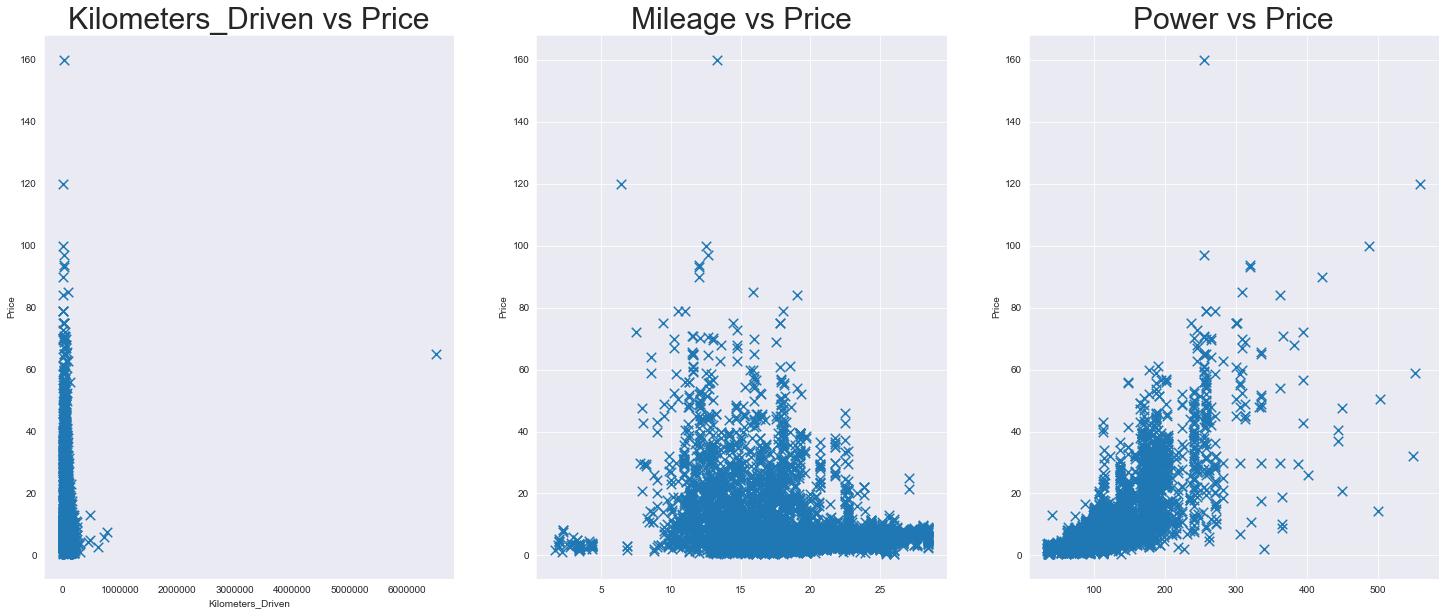

In [404]:
plt.figure(figsize=(25,10))
plt.subplot(131)
plt.scatter(train['Kilometers_Driven'], train['Price'], s=90,marker='x')
plt.title('Kilometers_Driven vs Price',fontsize = 30)
plt.xlabel('Kilometers_Driven')
plt.ylabel('Price')
plt.grid()
plt.subplot(132)
plt.title('Mileage vs Price',fontsize = 30)
plt.ylabel("Price")
plt.scatter(train['Mileage'], train['Price'], s=90,marker='x')
plt.subplot(133)
plt.title('Power vs Price',fontsize = 30)
plt.ylabel("Price")
plt.scatter(train['Power'], train['Price'], s=90,marker='x')
plt.show()

Since the relationship between variables is not clear from the above graphs, lmplot is used in the below graphs to determine the regression line that is followed by most of the points.

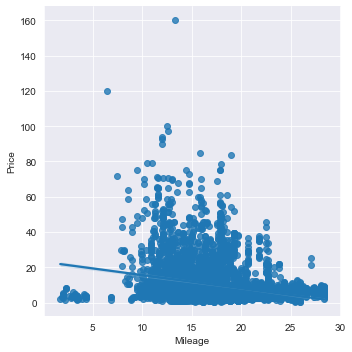

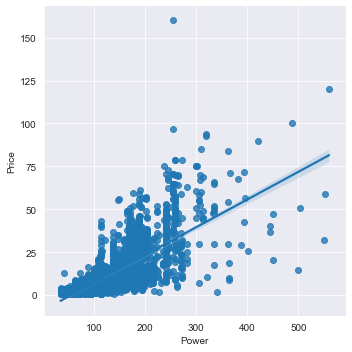

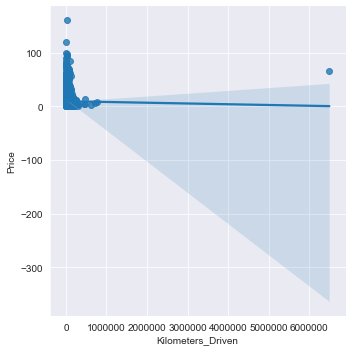

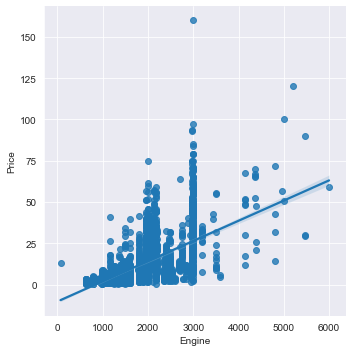

In [405]:
sns.lmplot('Mileage','Price',data=train)
sns.lmplot('Power','Price',data=train)
sns.lmplot('Kilometers_Driven','Price',data=train)
sns.lmplot('Engine','Price',data=train)

#### FACTORS AFFECTING MILEAGE

Text(0, 0.5, 'Mileage')

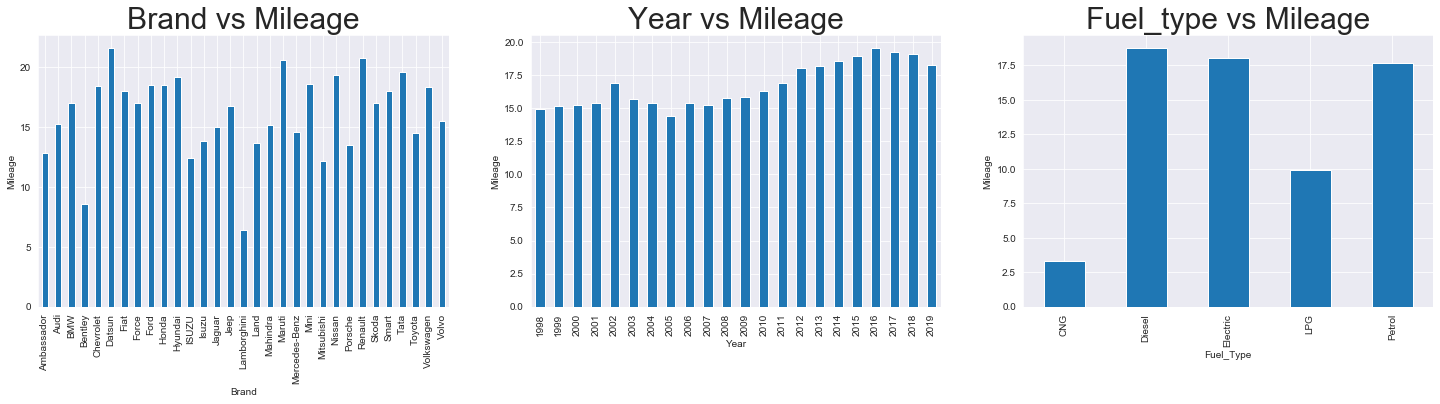

In [406]:
plt.figure(figsize=(25,5))
plt.subplot(131)
plt.title('Brand vs Mileage',fontsize = 30)
plt.ylabel("Mileage")
train.groupby('Brand')['Mileage'].mean().plot.bar()
plt.subplot(132)
train.groupby('Year')['Mileage'].mean().plot.bar()
plt.title('Year vs Mileage',fontsize = 30)
plt.ylabel("Mileage")
plt.subplot(133)
train.groupby('Fuel_Type')['Mileage'].mean().plot.bar()
plt.title('Fuel_type vs Mileage',fontsize = 30)
plt.ylabel("Mileage")

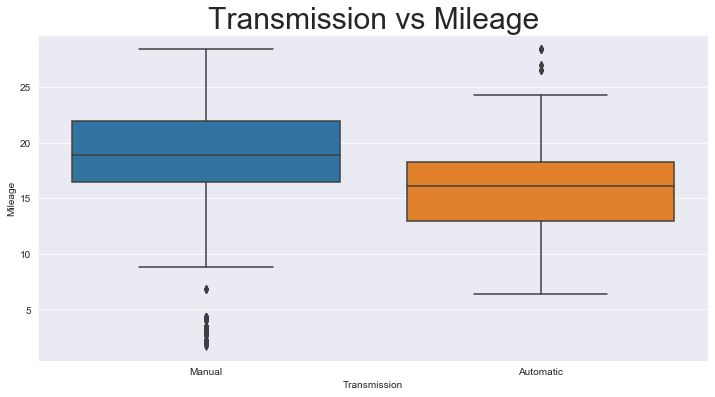

In [407]:
fig=plt.figure(figsize=(12,6))
plt.title('Transmission vs Mileage',fontsize = 30)
sns.boxplot(y='Mileage',x='Transmission',data=train)

INFERENCE:
- Datsun has the maximum mileage among all and Lambhorgini has the lowest mileage.
- The recent cars have slightly better mileage than old ones.
- CNG gives the worst mileage about 3 kmpl whereas the maximum- Diesel,Electric and Petrol are almost the same.
- Manual cars have a greater mileage than automatic cars.

#### FACTORS AFFECTING POWER

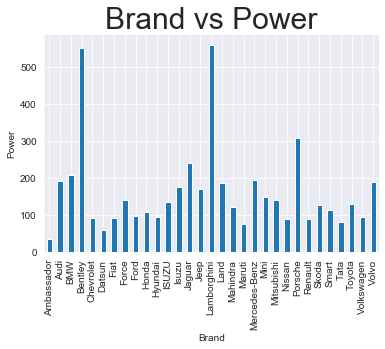

In [408]:
plt.title('Brand vs Power',fontsize = 30)
plt.ylabel("Power")
train.groupby('Brand')['Power'].mean().plot.bar()

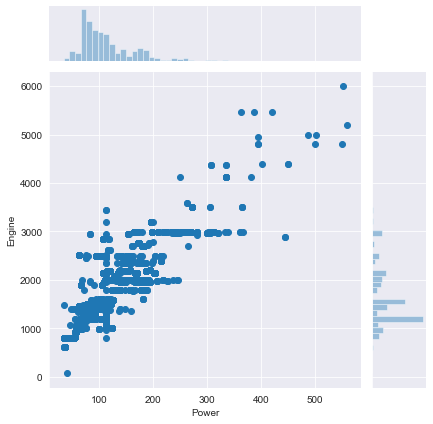

In [409]:
sns.jointplot(x='Power',y='Engine',data=train)

INFERENCE -
Both Bentley and Lambhorgini have the same power almost which is more than the rest. Ambassador has the least.

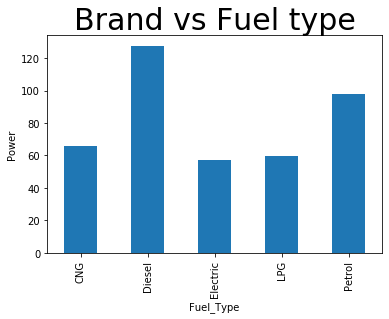

In [47]:
plt.title('Brand vs Fuel type',fontsize = 30)
plt.ylabel("Power")
train.groupby('Fuel_Type')['Power'].mean().plot.bar()

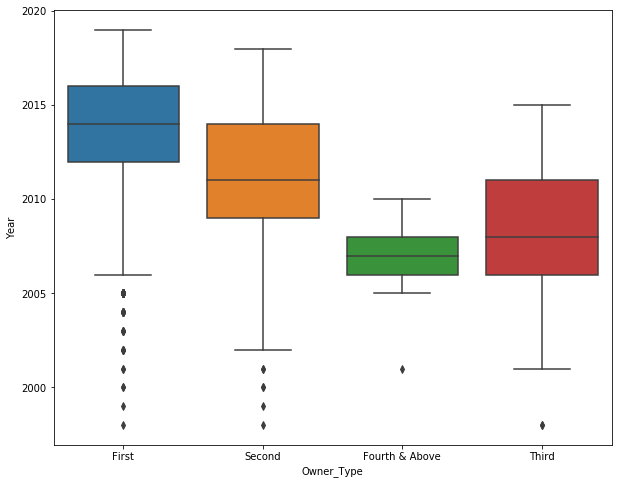

In [49]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Owner_Type', y='Year', data=train, width=0.8)

## CONVERTING CATEGORICAL VARIABLES TO NUMERICAL VARIABLES

In [410]:
train["Location"] = train["Location"].astype('category')
train["Location"] = train["Location"].cat.codes
train["Owner_Type"] = train["Owner_Type"].astype('category')
train["Owner_Type"] = train["Owner_Type"].cat.codes
train["Transmission"] = train["Transmission"].astype('category')
train["Transmission"] = train["Transmission"].cat.codes
train["Fuel_Type"] = train["Fuel_Type"].astype('category')
train["Fuel_Type"] = train["Fuel_Type"].cat.codes
train["Brand"] = train["Brand"].astype('category')
train["Brand"] = train["Brand"].cat.codes
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Unit Mileage,Brand
0,Maruti Wagon R LXI CNG,9,2010,72000,0,1,0,3.458,998.0,58.16,5.0,1.75,km/kg,18
1,Hyundai Creta 1.6 CRDi SX Option,10,2015,41000,1,1,0,19.670,1582.0,126.20,5.0,12.50,kmpl,10
2,Honda Jazz V,2,2011,46000,4,1,0,18.200,1199.0,88.70,5.0,4.50,kmpl,9
3,Maruti Ertiga VDI,2,2012,87000,1,1,0,20.770,1248.0,88.76,7.0,6.00,kmpl,18
4,Audi A4 New 2.0 TDI Multitronic,3,2013,40670,1,0,2,15.200,1968.0,140.80,5.0,17.74,kmpl,1


In [411]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   int8   
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   int8   
 5   Transmission       6019 non-null   int8   
 6   Owner_Type         6019 non-null   int8   
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   float64
 11  Price              6019 non-null   float64
 12  Unit Mileage       6017 non-null   object 
 13  Brand              6019 non-null   int8   
dtypes: float64(5), int64(2), int8(5), object(2)
memory usage: 452.7+ KB


In [412]:
train.corr()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
Location,1.000000,-0.020117,-0.042751,0.115048,0.040174,-0.033889,-0.015336,-0.079270,-0.064943,-0.037958,-0.116620,0.026295
Year,-0.020117,1.000000,-0.173048,-0.129526,-0.097059,-0.386160,0.274285,-0.045835,0.014063,0.014829,0.305327,0.018578
Kilometers_Driven,-0.042751,-0.173048,1.000000,-0.102953,0.025663,0.079924,-0.060366,0.090419,0.033397,0.083828,-0.011493,0.028232
Fuel_Type,0.115048,-0.129526,-0.102953,1.000000,0.125219,0.043017,-0.074287,-0.403265,-0.263810,-0.299249,-0.305207,-0.068246
Transmission,0.040174,-0.097059,0.025663,0.125219,1.000000,0.003002,0.312934,-0.498857,-0.638879,0.073470,-0.586025,0.168697
Owner_Type,-0.033889,-0.386160,0.079924,0.043017,0.003002,1.000000,-0.140340,0.046054,0.028543,0.001747,-0.094559,-0.027582
Mileage,-0.015336,0.274285,-0.060366,-0.074287,0.312934,-0.140340,1.000000,-0.565129,-0.479498,-0.311882,-0.289621,-0.037747
Engine,-0.079270,-0.045835,0.090419,-0.403265,-0.498857,0.046054,-0.565129,1.000000,0.857579,0.397992,0.657115,0.009539
Power,-0.064943,0.014063,0.033397,-0.263810,-0.638879,0.028543,-0.479498,0.857579,1.000000,0.100580,0.767382,-0.181538
Seats,-0.037958,0.014829,0.083828,-0.299249,0.073470,0.001747,-0.311882,0.397992,0.100580,1.000000,0.053787,0.188510


The above matrix shows all the possible correlations between variables.

For numerical variables, Negative correlation is a relationship between 2 variables in which as one variable increases, the other decreases and vice versa. A perfect negative correlation is -1, a 0 indicates no correlation, and a +1 indicates a perfect positive correlation.

# HEATMAP

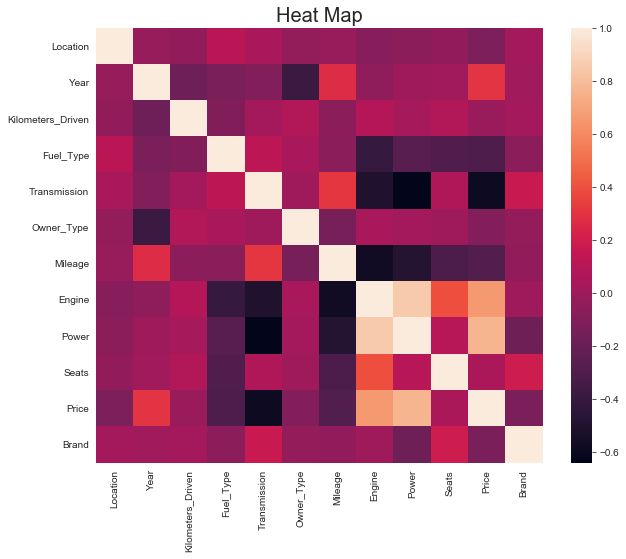

In [413]:
plt.figure(figsize=(10,8))
plt.title('Heat Map', fontsize=20)
sns.heatmap(train.corr())

The heat map shown above indicates the magnitude of correlation matrix using different intensities of colour in 2D.

## Cleaning Testing Data 

In [282]:
test = pd.read_excel('Data_Test.xlsx')

In [283]:
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [284]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   object 
 8   Engine             1224 non-null   object 
 9   Power              1224 non-null   object 
 10  Seats              1223 non-null   float64
dtypes: float64(1), int64(2), object(8)
memory usage: 106.2+ KB


In [285]:
test.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

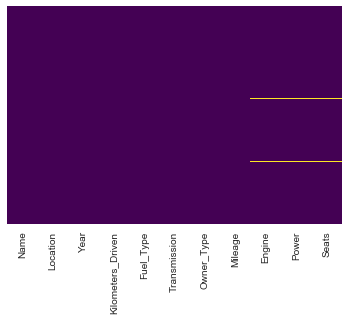

In [286]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [287]:
def stringremover(doc):
    l = doc.split()
    for i in l:
        try:
            num = float(i)
            return num
        except:
            continue

In [288]:
mil_data = []
test['Mileage'] = test['Mileage'].fillna("0.0")
for i in range(len(test['Mileage'])):
    doc = test['Mileage'][i]
    res = stringremover(doc)
    mil_data.append(res)
test['Mileage'] = mil_data
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197 CC,82.85 bhp,5.0


In [289]:
eng_data = []
test['Engine'] = test['Engine'].fillna("0.0")
for i in range(len(test['Engine'])):
    doc = test['Engine'][i]
    res = stringremover(doc)
    eng_data.append(res)
test['Engine'] = eng_data
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85 bhp,5.0


In [290]:
pow_data = []
test['Power'] = test['Power'].fillna("0.0")
for i in range(len(test['Power'])):
    doc = test['Power'][i]
    res = stringremover(doc)
    pow_data.append(res)
test['Power'] = pow_data
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,NaN,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0


In [291]:
test['Mileage'].replace(0.0,np.nan,inplace=True)
np.mean(test['Mileage'])

18.367354627354615

In [292]:
test['Mileage'].fillna(value=18.36,inplace=True)

In [293]:
test['Engine'].replace(0.0,np.nan,inplace=True)
np.mean(test['Engine'])

1593.5849673202615

In [294]:
test['Engine'].fillna(value=1590.09,inplace=True)

In [295]:
test['Power'].replace(0.0,np.nan,inplace=True)
np.mean(test['Power'])

110.38042013311168

In [296]:
test['Power'].fillna(value=110.45,inplace=True)

In [297]:
test.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                 0
Seats                11
dtype: int64

In [298]:
np.mean(test['Seats'])

5.28454619787408

In [299]:
test['Seats'].fillna(value=5.0,inplace=True)

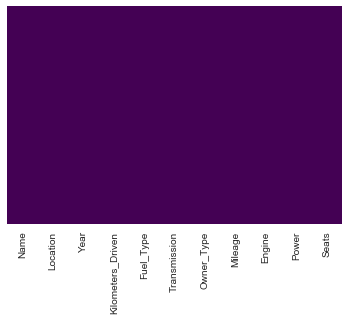

In [300]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [301]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   float64
 8   Engine             1234 non-null   float64
 9   Power              1234 non-null   float64
 10  Seats              1234 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 106.2+ KB


In [473]:
test['Brand'] = test.Name.str.split().str.get(0)
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Alto K10 LXI CNG,4,2014,40929,0,1,0,32.26,998.0,58.20,4.0,2.070063,Maruti
1,Maruti Alto 800 2016-2019 LXI,3,2013,54493,3,1,2,24.70,796.0,47.30,5.0,-1.577337,Maruti
2,Toyota Innova Crysta Touring Sport 2.4 MT,9,2017,34000,1,1,0,13.68,2393.0,147.80,7.0,17.117474,Toyota
3,Toyota Etios Liva GD,5,2012,139000,1,1,0,23.59,1364.0,110.45,5.0,7.028029,Toyota
4,Hyundai i20 Magna,9,2014,29000,3,1,0,18.50,1197.0,82.85,5.0,4.759861,Hyundai


In [474]:
test["Location"] = test["Location"].astype('category')
test["Location"] = test["Location"].cat.codes
test["Owner_Type"] = test["Owner_Type"].astype('category')
test["Owner_Type"] = test["Owner_Type"].cat.codes
test["Fuel_Type"] = test["Fuel_Type"].astype('category')
test["Fuel_Type"] = test["Fuel_Type"].cat.codes
test["Brand"] = test["Brand"].astype('category')
test["Brand"] = test["Brand"].cat.codes


In [475]:
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Alto K10 LXI CNG,4,2014,40929,0,1,0,32.26,998.0,58.20,4.0,2.070063,16
1,Maruti Alto 800 2016-2019 LXI,3,2013,54493,3,1,2,24.70,796.0,47.30,5.0,-1.577337,16
2,Toyota Innova Crysta Touring Sport 2.4 MT,9,2017,34000,1,1,0,13.68,2393.0,147.80,7.0,17.117474,26
3,Toyota Etios Liva GD,5,2012,139000,1,1,0,23.59,1364.0,110.45,5.0,7.028029,26
4,Hyundai i20 Magna,9,2014,29000,3,1,0,18.50,1197.0,82.85,5.0,4.759861,9


#### LINEAR REGRESSION

In [476]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [477]:
train.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Unit Mileage', 'Brand'],
      dtype='object')

In [478]:
X = train[[ 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats','Brand']]
y = train['Price']

In [44]:
X = train.drop(labels=['Price'], axis=1)
y = train['Price'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=1)

In [43]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((4514, 12), (4514,), (1505, 12), (1505,))

In [479]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [480]:
lm = LinearRegression()

In [481]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [482]:
# print the intercept
print(lm.intercept_)

-2016.283515530689


In [483]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Location,-0.218632
Year,1.004204
Kilometers_Driven,0.000002
Fuel_Type,-0.682133
Transmission,-2.590269
Owner_Type,-0.048949
Mileage,-0.122420
Engine,0.000504
Power,0.134798
Seats,-0.987152


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Year** is associated with an **increase of \$1.004204**.
- Holding all other features fixed, a 1 unit increase in **Kilometers_Driven** is associated with an **increase of \$0.000002**.
- Holding all other features fixed, **Going from Automatic to Manual** is associated with an **decrease of \$2.590269**.
- Holding all other features fixed, a 1 unit increase in **Mileage** is associated with an **decrease of \$0.122420**.
- Holding all other features fixed, a 1 unit increase in **Engine** is associated with an **increase of \$0.000504**.
- Holding all other features fixed, a 1 unit increase in **Power** is associated with an **increase of \$0.134798**.
- Holding all other features fixed, a 1 unit increase in **Seats** is associated with an **decrease of \$0.987152**.

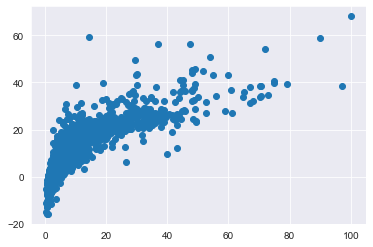

In [484]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

In [485]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.8160487709293176
MSE: 36.83768356372579
RMSE: 6.069405536271718


Now we test with the testing data

In [487]:
predictions = lm.predict(test[[ 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats','Brand']])

In [488]:
test['Price']=predictions

In [38]:
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0
